In [163]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

k = 4
filename = "example2.dat"

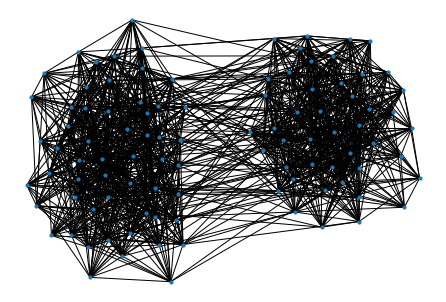

In [164]:
# Read the data
graph_unsorted = nx.read_edgelist(filename, delimiter=",", nodetype=int, data=(("weight", int), ))
graph = nx.Graph()
graph.add_nodes_from(sorted(graph_unsorted.nodes.keys()))
graph.add_edges_from(graph_unsorted.edges)

nx.draw(graph, node_size=10)

In [166]:
# 1. Form the affinity matrix
A = np.zeros([graph.number_of_nodes(), graph.number_of_nodes()])
for edge in graph.edges:
    A[edge[0] - 1, edge[1] - 1] = 1
    A[edge[1] - 1, edge[0] - 1] = 1

In [167]:
# 2. Define D and L
D = np.diag(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_inv, A), D_inv)

In [168]:
# 3. Find eigenvectors
values, eigenvectors = np.linalg.eigh(L)  # Gives eigenvectors in asceding order
X = eigenvectors[:, -k:]             # Take k largest eigenvectors

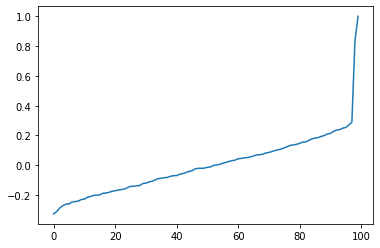

In [169]:
plt.plot(values)
plt.show()

In [170]:
# 4. Form matrix Y by renormalizing X
Y = np.zeros_like(X)
for i in range(k):
    square = X[:, i].dot(X[:, i])
    Y[:, i] = X[:, i] / np.sqrt(square)    

In [171]:
# 5. Apply k-means cluster
# labels = KMeans(n_clusters=k).fit(Y).labels_

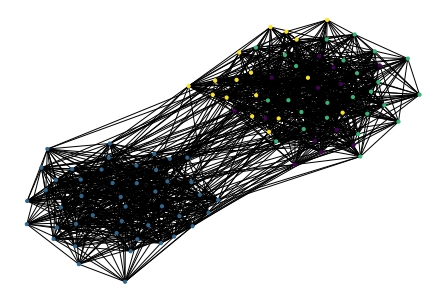

In [147]:
plt.figure()
nx.draw(graph, node_size=10, node_color=labels)
plt.show()

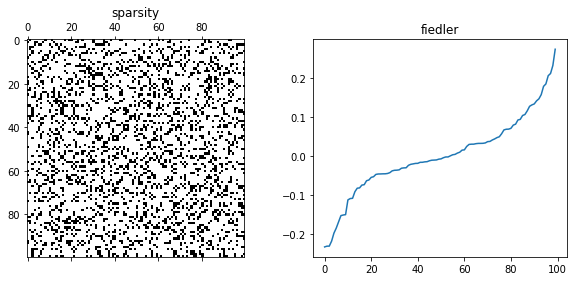

In [148]:
L = D - A
values, vectors = np.linalg.eigh(L) 
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(X[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()